# Importing dataset

In [2]:
pip install datasets

   ---------------------------------------- 0.0/536.7 kB ? eta -:--:--
   ---------------------------------------  524.3/536.7 kB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 536.7/536.7 kB 973.7 kB/s  0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------  2.9/2.9 MB 15.3 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 11.3 MB/s  0:00:00
   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   - -------------------------------------- 1.3/27.7 MB 8.4 MB/s eta 0:00:04
   --------- ------------------------------ 6.3/27.7 MB 14.9 MB/s eta 0:00:02
   ----------------- ---------------------- 12.1/27.7 MB 19.9 MB/s eta 0:00:01
   ------------------------- -------------- 17.6/27.7 MB 20.9 MB/s eta 0:00:01
   -------------------------------------- - 26.5/27.7 MB 25.0 MB/s eta 0:00:01
   ---------------------------------------- 27.7/27.7 MB 22.2 MB/s  0:00:01

   -- -----

Installing the required libraries

In [1]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset(
    "starmpcc/Asclepius-Synthetic-Clinical-Notes",
    split="train"
)
df = dataset.to_pandas()
print(df.head())

C:\Users\rajak\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   patient_id                                               note  \
0           0  Discharge Summary:\n\nPatient: 60-year-old mal...   
1           1  Discharge Summary:\n\nAdmission Date: [Insert ...   
2           2  Hospital Course Summary:\n\nAdmission Date: [I...   
3           3  Discharge Summary:\n\nPatient: 69-year-old mal...   
4           4  Discharge Summary:\n\nPatient Information:\n- ...   

                                            question  \
0  Can you provide a simplified paraphrase of the...   
1  Which coreferences were resolved in the hospit...   
2  What were the key improvements in the patient'...   
3  What roles did physical therapists have in the...   
4  What manual airway clearance techniques were u...   

                                              answer                    task  
0  The healthcare team used a gradual approach to...            Paraphrasing  
1  The hospital course section resolved the coref...  Coreference Resolution  
2  During the hos

Importing the dataset from the web for the further processing.

In [4]:
print(df.columns)

Index(['patient_id', 'note', 'question', 'answer', 'task'], dtype='object')


understanding the existence of the columns

# Exploring dataset sample

In [7]:
sample = df['note'].iloc[0]
print(sample)

Discharge Summary:

Patient: 60-year-old male with moderate ARDS from COVID-19

Hospital Course:

The patient was admitted to the hospital with symptoms of fever, dry cough, and dyspnea. During physical therapy on the acute ward, the patient experienced coughing attacks that induced oxygen desaturation and dyspnea with any change of position or deep breathing. To avoid rapid deterioration and respiratory failure, a step-by-step approach was used for position changes. The breathing exercises were adapted to avoid prolonged coughing and oxygen desaturation, and with close monitoring, the patient managed to perform strength and walking exercises at a low level. Exercise progression was low initially but increased daily until hospital discharge to a rehabilitation clinic on day 10.

Clinical Outcome:

The patient was discharged on day 10 to a rehabilitation clinic making satisfactory progress with all symptoms resolved.

Follow-up:

The patient will receive follow-up care at the rehabilita

In [2]:
sample = df['note'].iloc[1]
print(sample)

Discharge Summary:

Admission Date: [Insert Date]
Discharge Date: [Insert Date]

Patient Name: [Insert Name]
Age/Sex: 39-year-old Male
Medical Record Number: [Insert Number]

Admission Diagnosis: Unspecified respiratory tract infection
Discharge Diagnosis: Resolved respiratory tract infection

Hospital Course: The patient was hospitalized due to persistent fever and dry cough for 2 weeks, leading to reduced general health condition. On admission, the patient required 4 L/min of oxygen due to rapid shallow breathing at rest and severe breathlessness during minor physical activity. The initial physical therapy focused on educating the patient on dyspnea-relieving positions, mobilization techniques, and deep-breathing exercises. However, with time, the patient's anxiety-induced dyspnea became an issue, leading to the modification of therapy to relieve his dyspnea.

The patient positively responded to the therapy, evidenced by a reduction in respiratory rate from 30 to 22 breaths/min and a

In [3]:
sample = df['note'].iloc[4]
print(sample)

Discharge Summary:

Patient Information:
- Name: [Redacted]
- Age: 57
- Gender: Male
- Admission Date: [Redacted]
- Discharge Date: N/A
- Medical Record Number: [Redacted]

Hospital Course Summary:
- The patient was admitted to the ICU with symptoms of dyspnea, heavy dry cough, and fever after testing positive for COVID-19.
- Despite initial ability to exercise and sit in a chair with a physical therapist, the patient's respiratory condition progressively worsened, requiring intubation and proning.
- The patient's large amounts of bronchial mucus and respiratory failure necessitated regular suctioning and respiratory therapy.
- Manual airway clearance techniques were employed by 1-2 physical therapists to increase effective airway clearance while avoiding alveolar collapse with some success.
- After extubation, the patient continued to require intensive manual airway clearance techniques, nasal rinsing, and airway suctioning.
- Additional physical therapy interventions, including passi

Planned to explore the three sample data for the today. To understand the clinical text manually

# Noise Vs Meaningful terms- Manual

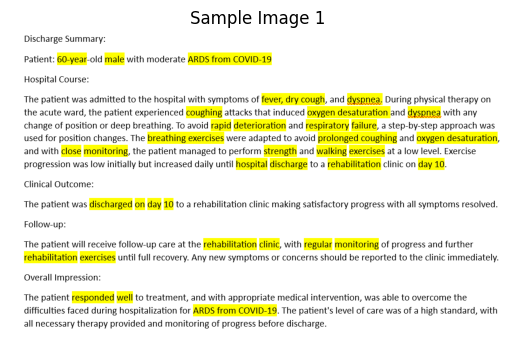

In [2]:
import matplotlib.pyplot as plt
import cv2
# Load image 
img = cv2.imread(r"C:\Users\rajak\OneDrive\Pictures\Screenshots\Screenshot 2026-02-04 165643.png")
# Convert BGR to RGB 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display image
plt.imshow(img)
plt.axis("off")
plt.title("Sample Image 1")
plt.show()

In the above image for patient 1, the sample data was taken, and all the clinical terms have been highlighted, and the noises that exist in the sentence are left unhighlighted. The highlighted terms for the patient generally consist of the symptoms, patient data such as age and gender have been marked, treatment given to the particular diagnosis has been marked, and recovery time has been highlighted for patient 1.

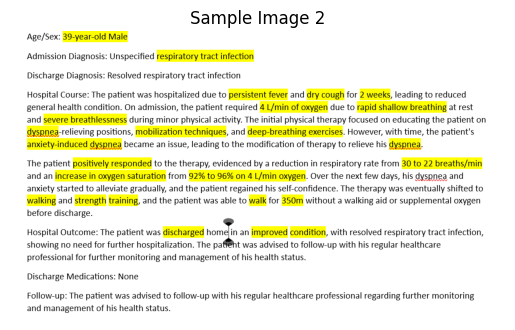

In [3]:
import matplotlib.pyplot as plt
import cv2
# Load image 
img = cv2.imread(r"C:\Users\rajak\OneDrive\Pictures\Screenshots\Screenshot 2026-02-04 170916.png")
# Convert BGR to RGB 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display image
plt.imshow(img)
plt.axis("off")
plt.title("Sample Image 2")
plt.show()

In the case of the second patient. The symptoms, disease that have been diagnosed, treatment that has been provided, and the medication given are marked as the important clinical insisignts and the others are considered as the noise. In this subject, they didn't provide the recovery time. Then the subject's treatment was observed.

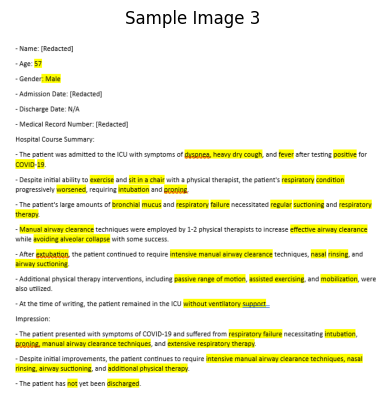

In [1]:
import matplotlib.pyplot as plt
import cv2
# Load image 
img = cv2.imread(r"C:\Users\rajak\OneDrive\Pictures\Screenshots\Screenshot 2026-02-05 092001.png")
# Convert BGR to RGB 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display image
plt.imshow(img)
plt.axis("off")
plt.title("Sample Image 3")
plt.show()

In sample 3, the clinically important terms have been marked. This person also didn't include the discharge information. The noises of the paragraphs are not highlighted. The symptoms, diagnosed disease, basic treatments, and intensive treatments were marked and highlighted. This patient lacks the recovery period and time of discharge.

# Structured Vs Unstructured data

structured data: The structured data is highly organised data. In samples 2 and 3, the patient demographic informations are arranged well in an organised way.


An example of structured data:

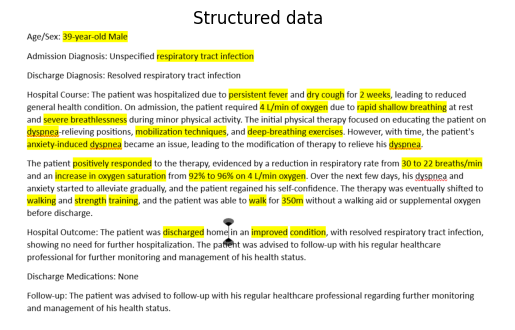

In [6]:
import matplotlib.pyplot as plt
import cv2
# Load image 
img = cv2.imread(r"C:\Users\rajak\OneDrive\Pictures\Screenshots\Screenshot 2026-02-04 170916.png")
# Convert BGR to RGB 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display image
plt.imshow(img)
plt.axis("off")
plt.title("Structured data")
plt.show()

In the above given example the patient demographics and disease diagnose are noted in the structured way.

Unstructured data: The unstructured data is an inorganised data where the patient nforations are generally stored in a sentence format. In the case of sample 1, the patients' demographics are stored in an unstructured form.

An example of unstructured data:

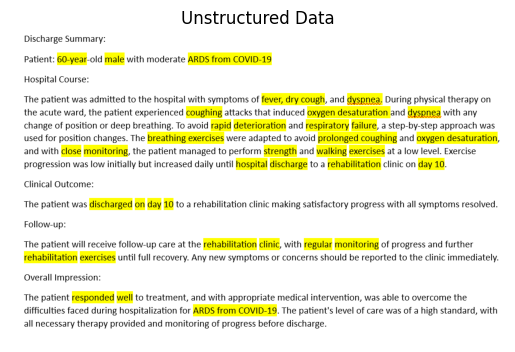

In [9]:
import matplotlib.pyplot as plt
import cv2
# Load image 
img = cv2.imread(r"C:\Users\rajak\OneDrive\Pictures\Screenshots\Screenshot 2026-02-04 165643.png")
# Convert BGR to RGB 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display image
plt.imshow(img)
plt.axis("off")
plt.title("Unstructured Data")
plt.show()

In the above given example the patient information and the disease diagnose are noted in an inorganised way.